In [236]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
sns.set_theme()

## Load data

In [177]:
with open('data/starships.geojson') as f:
    data = json.load(f)

## Drop useless information

### Extract from data

In [178]:
data = data['features']
data = pd.DataFrame(data)

In [179]:
data.head()

,type,properties,geometry
0,Feature,"{'id': 2524742, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94941450..."
1,Feature,"{'id': 2525762, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94889609..."
2,Feature,"{'id': 2524782, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94730510..."
3,Feature,"{'id': 2524782, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94790694..."
4,Feature,"{'id': 2524742, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94946217..."


In [180]:
data.head()

,type,properties,geometry
0,Feature,"{'id': 2524742, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94941450..."
1,Feature,"{'id': 2525762, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94889609..."
2,Feature,"{'id': 2524782, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94730510..."
3,Feature,"{'id': 2524782, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94790694..."
4,Feature,"{'id': 2524742, 'level1': 'Spaceship', 'level2...","{'type': 'Point', 'coordinates': [-19.94946217..."


In [181]:
data.shape

(3467, 3)

In [182]:
data['properties'][0]

{'id': 2524742,
 'level1': 'Spaceship',
 'level2': 'Imperial SpaceShuttle',
 'stream_date': '0121/03/20 12:00:00',
 'force_operante': 'Galactic Empire',
 'site_type': ['Spaceport']}

In [183]:
data['geometry'][0]

{'type': 'Point', 'coordinates': [-19.9494145077604, 27.550263020416665]}

### Investigate constants

In [184]:
# Drop constant type column
print(data['type'].nunique())
data.drop('type', axis=1, inplace=True)

1


In [185]:
# Create dataframe prop and geom from data
prop = data['properties']
prop = pd.DataFrame(list(prop))
geom = data['geometry']
geom = pd.DataFrame(list(geom))

In [186]:
# Drop level1
print(prop['level1'].nunique())
prop.drop('level1', axis=1, inplace=True)

1


In [187]:
# Drop force_operante
print(prop['force_operante'].nunique())
prop.drop('force_operante', axis=1, inplace=True)

1


In [188]:
# Drop site_type
print(prop.shape)
print(sum(prop['site_type'].apply(lambda x: x==['Spaceport'])))
prop.drop('site_type', axis=1, inplace=True)

(3467, 4)
3467


- Since these have the same length, the column site_type is constant
- Drop it!

In [189]:
prop

,id,level2,stream_date
0,2524742,Imperial SpaceShuttle,0121/03/20 12:00:00
1,2525762,Imperial SpaceShuttle,0121/03/20 12:00:00
2,2524782,Imperial SpaceShuttle,0121/03/20 12:00:00
3,2524782,Imperial SpaceShuttle,0121/03/20 12:00:00
4,2524742,Imperial SpaceShuttle,0121/03/20 12:00:00
...,...,...,...
3462,3455,Imperial SpaceShuttle,0121/04/28 12:00:00
3463,3456,Imperial SpaceShuttle,0121/03/20 12:00:00
3464,3457,Imperial SpaceShuttle,0121/03/20 12:00:00
3465,3458,Imperial SpaceShuttle,0121/03/20 12:00:00


### Investigate duplicates

In [190]:
idx_dup = prop[prop['id'].duplicated()].index

In [191]:
prop[prop['id'].duplicated()]

,id,level2,stream_date
3,2524782,Imperial SpaceShuttle,0121/03/20 12:00:00
4,2524742,Imperial SpaceShuttle,0121/03/20 12:00:00
6,2524782,Imperial SpaceShuttle,0121/03/20 12:00:00
7,2525762,Imperial SpaceShuttle,0121/03/20 12:00:00


- There are only 4 redundant ids
- These are definitely duplicates, since having the same stream_date
- The problem is: they correspond to different coordinates

In [192]:
geom['type'].nunique()

1

In [193]:
# Drop constant type column
geom.drop('type', axis=1, inplace=True)

In [194]:
geom['lon'] = geom['coordinates'].apply(lambda x: x[0])
geom['lat'] = geom['coordinates'].apply(lambda x: x[1])

In [195]:
geom.drop('coordinates', axis=1, inplace=True)
coordinates = geom

In [196]:
coordinates.iloc[idx_dup]

,lon,lat
3,-19.947907,27.550382
4,-19.949462,27.550728
6,-19.947955,27.550847
7,-19.948944,27.550770


- The duplicated spaceship is indeed at different places at the same time
- Since the number of rows (4) is not significant compared to the whole dataset (3467), let's drop these records

In [197]:
# Drop duplicated rows
prop.drop(idx_dup, axis=0, inplace=True)
coordinates.drop(idx_dup, axis=0, inplace=True)

- Id is now unique

## Merge dataframes

In [198]:
# Concat dataframes
data = pd.concat([prop, geom], axis=1)

In [199]:
# Use id as index (and drop it from the columns)
data.set_index('id', drop=True, inplace=True)

In [200]:
# Control id is unique
sum(data.index.duplicated())

0

In [201]:
data

,level2,stream_date,lon,lat
id,,,,
2524742,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.949415,27.550263
2525762,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.948896,27.550305
2524782,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.947305,27.550418
2524752,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.948473,27.550805
1,TIE Fighter,0118/05/07 12:00:00,-19.950145,27.552059
...,...,...,...,...
3455,Imperial SpaceShuttle,0121/04/28 12:00:00,-19.923158,27.523213
3456,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.916802,27.515392
3457,Imperial SpaceShuttle,0121/03/20 12:00:00,-19.948425,27.550340


## To continue

In [202]:
# Investigate the number of snapshots
data['stream_date'].nunique()

74

### Inspect stream_date

In [215]:
# First 2 digits
dt_2 = data['stream_date'].apply(lambda x: x[:2])
dt_2.nunique()

1

- The first 2 digits are constants, it ca be deleted safely

In [217]:
data['stream_date'] = data['stream_date'].apply(lambda x: x[2:])

In [220]:
# Extract and cast as datetime
dt = pd.to_datetime(data['stream_date'])

In [225]:
dt.sort_values()

id
2249   2001-05-20 12:00:00
2277   2001-05-20 12:00:00
2276   2001-05-20 12:00:00
2275   2001-05-20 12:00:00
2274   2001-05-20 12:00:00
               ...        
1392   2031-07-19 12:00:00
1390   2031-07-19 12:00:00
1389   2031-07-19 12:00:00
1387   2031-07-19 12:00:00
1399   2031-07-19 12:00:00
Name: stream_date, Length: 3463, dtype: datetime64[ns]

In [229]:
year = dt.apply(lambda x: x.year)

<BarContainer object of 29 artists>

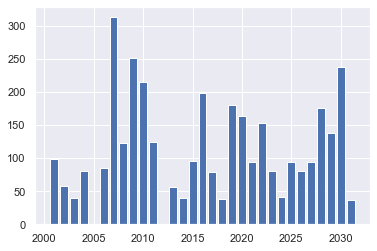

In [242]:
year_counts = year.value_counts()
plt.bar(year_counts.index, year_counts.values)

- The date parsing seems to have been done properly
- Use the casted datetime as stream_date field

In [244]:
data['stream_date'] = dt

In [247]:
data.sort_values('id', inplace=True)

- id is coherent with stream_date which further confirms the good date parsing

In [248]:
data

,level2,stream_date,lon,lat
id,,,,
1,TIE Fighter,2007-05-18 12:00:00,-19.950145,27.552059
2,TIE bomber,2007-05-18 12:00:00,-19.925915,27.527897
3,TIE bomber,2007-05-18 12:00:00,-19.927374,27.527464
4,TIE Fighter,2007-05-18 12:00:00,-19.915460,27.516342
5,TIE Fighter,2007-05-18 12:00:00,-19.948334,27.557954
...,...,...,...,...
3459,Imperial SpaceShuttle,2020-03-21 12:00:00,-19.916284,27.515434
2524742,Imperial SpaceShuttle,2020-03-21 12:00:00,-19.949415,27.550263
2524752,Imperial SpaceShuttle,2020-03-21 12:00:00,-19.948473,27.550805
